# 第6章: グラフ分析の基礎

## 学習目標
- グラフの基本統計量を理解する
- 連結性の分析を習得する
- 密度と次数分布を分析する
- グラフの構造的特性を把握する

## 難易度: 中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from collections import Counter
%matplotlib inline

---
## 6.1 基本統計量

In [2]:
# サンプルグラフの作成
G = nx.karate_club_graph()
print(f"空手クラブグラフを使用")
print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")

空手クラブグラフを使用
ノード数: 34
エッジ数: 78


### 6.1.1 グラフの密度（Density）

実際のエッジ数と可能な最大エッジ数の比率。

$$\text{density} = \frac{2|E|}{|V|(|V|-1)}$$

In [3]:
# 密度の計算
density = nx.density(G)
print(f"グラフ密度: {density:.4f}")
print(f"（0 = スパース、1 = 完全グラフ）")

# 手計算で確認
n = G.number_of_nodes()
m = G.number_of_edges()
manual_density = 2 * m / (n * (n - 1))
print(f"手計算: {manual_density:.4f}")

グラフ密度: 0.1390
（0 = スパース、1 = 完全グラフ）
手計算: 0.1390


### 6.1.2 次数統計

In [4]:
# 次数の統計
degrees = [d for n, d in G.degree()]

print("=== 次数統計 ===")
print(f"平均次数: {np.mean(degrees):.2f}")
print(f"中央値: {np.median(degrees):.2f}")
print(f"標準偏差: {np.std(degrees):.2f}")
print(f"最小次数: {min(degrees)}")
print(f"最大次数: {max(degrees)}")

=== 次数統計 ===
平均次数: 4.59
中央値: 3.00
標準偏差: 3.82
最小次数: 1
最大次数: 17


/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9680/637532602.py:21: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing f

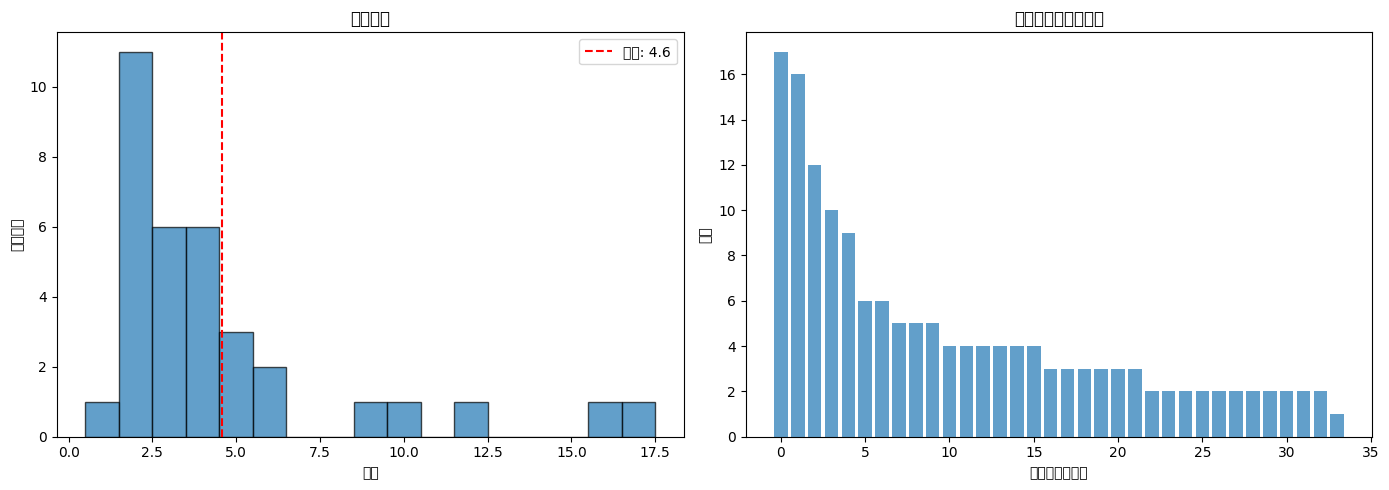

In [5]:
# 次数分布
degree_sequence = sorted(degrees, reverse=True)
degree_count = Counter(degrees)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ヒストグラム
axes[0].hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black', alpha=0.7, align='left')
axes[0].set_xlabel('次数')
axes[0].set_ylabel('ノード数')
axes[0].set_title('次数分布')
axes[0].axvline(np.mean(degrees), color='red', linestyle='--', label=f'平均: {np.mean(degrees):.1f}')
axes[0].legend()

# ランクプロット
axes[1].bar(range(len(degree_sequence)), degree_sequence, alpha=0.7)
axes[1].set_xlabel('ノードのランク')
axes[1].set_ylabel('次数')
axes[1].set_title('次数ランクプロット')

plt.tight_layout()
plt.show()

---
## 6.2 連結性の分析

### 6.2.1 連結成分

In [6]:
# 連結かどうか
print(f"連結グラフか: {nx.is_connected(G)}")

連結グラフか: True


In [7]:
# 非連結グラフを作成して分析
H = nx.Graph()
# 2つの独立した部分グラフ
H.add_edges_from([(1,2), (2,3), (3,1)])  # 三角形1
H.add_edges_from([(4,5), (5,6), (6,7), (7,4)])  # 四角形
H.add_node(8)  # 孤立ノード

print(f"\n非連結グラフ H:")
print(f"連結か: {nx.is_connected(H)}")
print(f"連結成分数: {nx.number_connected_components(H)}")


非連結グラフ H:
連結か: False
連結成分数: 3


In [8]:
# 各連結成分
print("\n=== 連結成分 ===")
for i, component in enumerate(nx.connected_components(H), 1):
    print(f"成分{i}: {component}")


=== 連結成分 ===
成分1: {1, 2, 3}
成分2: {4, 5, 6, 7}
成分3: {8}


In [9]:
# 最大連結成分
largest_cc = max(nx.connected_components(H), key=len)
print(f"\n最大連結成分: {largest_cc}")
print(f"サイズ: {len(largest_cc)}")

# 最大連結成分のサブグラフ
largest_subgraph = H.subgraph(largest_cc).copy()
print(f"サブグラフのエッジ数: {largest_subgraph.number_of_edges()}")


最大連結成分: {4, 5, 6, 7}
サイズ: 4
サブグラフのエッジ数: 4


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36899 (\N{CJK UNIFIED IDEOGRAPH-9023}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-pac

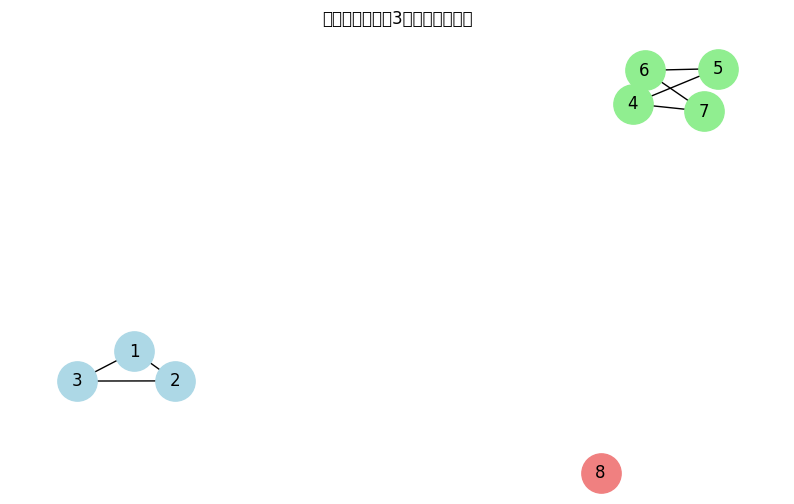

In [10]:
# 可視化
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(H, seed=42)

# 連結成分ごとに色分け
colors = ['lightblue', 'lightgreen', 'lightcoral']
for i, component in enumerate(nx.connected_components(H)):
    nx.draw_networkx_nodes(H, pos, nodelist=list(component), 
                          node_color=colors[i % len(colors)], node_size=800)

nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos, font_size=12)
plt.title(f"非連結グラフ（{nx.number_connected_components(H)}つの連結成分）")
plt.axis('off')
plt.show()

### 6.2.2 直径と平均経路長

In [11]:
# 直径（最長の最短経路）
diameter = nx.diameter(G)
print(f"直径: {diameter}")

# 半径（中心からの最大距離の最小値）
radius = nx.radius(G)
print(f"半径: {radius}")

# 平均最短経路長
avg_path_length = nx.average_shortest_path_length(G)
print(f"平均最短経路長: {avg_path_length:.4f}")

直径: 5
半径: 3
平均最短経路長: 2.4082


In [12]:
# 離心率（eccentricity）: 各ノードから最も遠いノードまでの距離
eccentricity = nx.eccentricity(G)
print("\n=== 離心率（上位5ノード） ===")
sorted_ecc = sorted(eccentricity.items(), key=lambda x: x[1])
for node, ecc in sorted_ecc[:5]:
    print(f"ノード {node}: {ecc}")


=== 離心率（上位5ノード） ===
ノード 0: 3
ノード 1: 3
ノード 2: 3
ノード 3: 3
ノード 8: 3


In [13]:
# 中心ノードと周辺ノード
center = nx.center(G)
periphery = nx.periphery(G)
print(f"\n中心ノード: {center}")
print(f"周辺ノード: {periphery}")


中心ノード: [0, 1, 2, 3, 8, 13, 19, 31]
周辺ノード: [14, 15, 16, 18, 20, 22, 23, 26, 29]


---
## 6.3 クラスタリング係数

### 6.3.1 局所クラスタリング係数

ノードの隣接ノード同士がどれだけ接続しているかの指標。

In [14]:
# 局所クラスタリング係数
local_clustering = nx.clustering(G)

print("=== 局所クラスタリング係数（上位10ノード） ===")
sorted_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[:10]
for node, coef in sorted_clustering:
    print(f"ノード {node}: {coef:.4f}")

=== 局所クラスタリング係数（上位10ノード） ===
ノード 7: 1.0000
ノード 12: 1.0000
ノード 14: 1.0000
ノード 15: 1.0000
ノード 16: 1.0000
ノード 17: 1.0000
ノード 18: 1.0000
ノード 20: 1.0000
ノード 21: 1.0000
ノード 22: 1.0000


In [15]:
# グラフ全体のクラスタリング係数
avg_clustering = nx.average_clustering(G)
print(f"\n平均クラスタリング係数: {avg_clustering:.4f}")

# 推移性（transitivity）
transitivity = nx.transitivity(G)
print(f"推移性: {transitivity:.4f}")


平均クラスタリング係数: 0.5706
推移性: 0.2557


In [16]:
# 三角形の数
triangles = nx.triangles(G)
total_triangles = sum(triangles.values()) // 3  # 各三角形は3回カウントされる
print(f"\n三角形の総数: {total_triangles}")


三角形の総数: 45


---
## 6.4 有向グラフの分析

In [17]:
# 有向グラフの作成
DG = nx.DiGraph()
DG.add_edges_from([
    (1, 2), (2, 3), (3, 1),  # サイクル
    (1, 4), (4, 5), (5, 6),
    (6, 4),  # 別のサイクル
    (3, 7), (7, 8)
])

print(f"ノード数: {DG.number_of_nodes()}")
print(f"エッジ数: {DG.number_of_edges()}")

ノード数: 8
エッジ数: 9


In [18]:
# 弱連結性と強連結性
print(f"弱連結か: {nx.is_weakly_connected(DG)}")
print(f"強連結か: {nx.is_strongly_connected(DG)}")

print(f"\n弱連結成分数: {nx.number_weakly_connected_components(DG)}")
print(f"強連結成分数: {nx.number_strongly_connected_components(DG)}")

弱連結か: True
強連結か: False

弱連結成分数: 1
強連結成分数: 4


In [19]:
# 強連結成分
print("\n=== 強連結成分 ===")
for i, scc in enumerate(nx.strongly_connected_components(DG), 1):
    print(f"成分{i}: {scc}")


=== 強連結成分 ===
成分1: {8}
成分2: {7}
成分3: {4, 5, 6}
成分4: {1, 2, 3}


In [20]:
# 入次数と出次数
print("\n=== 入次数・出次数 ===")
for node in DG.nodes():
    print(f"ノード {node}: 入次数={DG.in_degree(node)}, 出次数={DG.out_degree(node)}")


=== 入次数・出次数 ===
ノード 1: 入次数=1, 出次数=2
ノード 2: 入次数=1, 出次数=1
ノード 3: 入次数=1, 出次数=2
ノード 4: 入次数=2, 出次数=1
ノード 5: 入次数=1, 出次数=1
ノード 6: 入次数=1, 出次数=1
ノード 7: 入次数=1, 出次数=1
ノード 8: 入次数=1, 出次数=0


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24375 (\N{CJK UNIFIED IDEOGRAPH-5F37}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


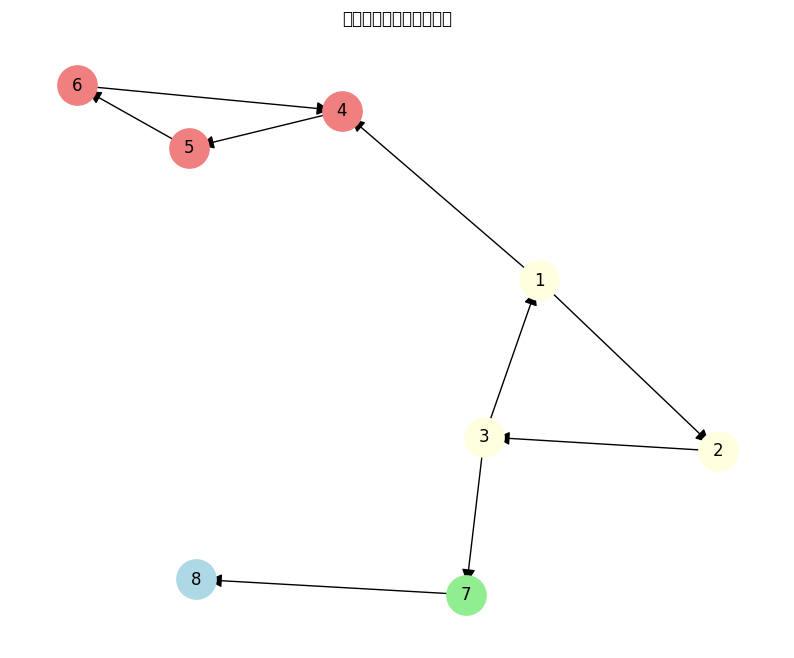

In [21]:
# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(DG, seed=42)

# 強連結成分で色分け
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'plum']
for i, scc in enumerate(nx.strongly_connected_components(DG)):
    nx.draw_networkx_nodes(DG, pos, nodelist=list(scc), 
                          node_color=colors[i % len(colors)], node_size=800)

nx.draw_networkx_edges(DG, pos, arrows=True, arrowsize=20)
nx.draw_networkx_labels(DG, pos, font_size=12)
plt.title("有向グラフと強連結成分")
plt.axis('off')
plt.show()

---
## 例題1: ソーシャルネットワーク分析

In [22]:
# 空手クラブグラフの詳細分析
G = nx.karate_club_graph()

print("="*50)
print("空手クラブネットワーク分析レポート")
print("="*50)

# 基本統計
print("\n【基本統計】")
print(f"メンバー数（ノード）: {G.number_of_nodes()}")
print(f"関係数（エッジ）: {G.number_of_edges()}")
print(f"密度: {nx.density(G):.4f}")

# 連結性
print("\n【連結性】")
print(f"連結: {nx.is_connected(G)}")
print(f"直径: {nx.diameter(G)}")
print(f"平均経路長: {nx.average_shortest_path_length(G):.4f}")

# クラスタリング
print("\n【クラスタリング】")
print(f"平均クラスタリング係数: {nx.average_clustering(G):.4f}")
print(f"推移性: {nx.transitivity(G):.4f}")

# 次数分析
degrees = dict(G.degree())
print("\n【次数分析】")
print(f"平均次数: {np.mean(list(degrees.values())):.2f}")
print(f"最大次数: {max(degrees.values())} (ノード: {max(degrees, key=degrees.get)})")
print(f"最小次数: {min(degrees.values())}")

空手クラブネットワーク分析レポート

【基本統計】
メンバー数（ノード）: 34
関係数（エッジ）: 78
密度: 0.1390

【連結性】
連結: True
直径: 5
平均経路長: 2.4082

【クラスタリング】
平均クラスタリング係数: 0.5706
推移性: 0.2557

【次数分析】
平均次数: 4.59
最大次数: 17 (ノード: 33)
最小次数: 1


In [23]:
# クラブ（派閥）別の分析
clubs = nx.get_node_attributes(G, 'club')

mr_hi = [n for n, c in clubs.items() if c == 'Mr. Hi']
officer = [n for n, c in clubs.items() if c == 'Officer']

print("\n【派閥別分析】")
print(f"Mr. Hi派: {len(mr_hi)}人")
print(f"Officer派: {len(officer)}人")

# 派閥内・派閥間のエッジ数
intra = 0
inter = 0
for u, v in G.edges():
    if clubs[u] == clubs[v]:
        intra += 1
    else:
        inter += 1

print(f"\n派閥内のつながり: {intra}")
print(f"派閥間のつながり: {inter}")
print(f"派閥間比率: {inter/(intra+inter)*100:.1f}%")


【派閥別分析】
Mr. Hi派: 17人
Officer派: 17人

派閥内のつながり: 67
派閥間のつながり: 11
派閥間比率: 14.1%


---
## 練習問題

### 練習問題1: ランダムグラフの分析

Erdős-Rényiモデルで3つのグラフを生成し、密度の違いがグラフの特性にどう影響するか分析してください。

- G1: n=50, p=0.05
- G2: n=50, p=0.15
- G3: n=50, p=0.30

比較項目:
1. 連結性（連結か、連結成分数）
2. 平均次数
3. クラスタリング係数
4. 直径（連結の場合）

In [24]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
graphs = {
    "G1 (p=0.05)": nx.erdos_renyi_graph(50, 0.05, seed=42),
    "G2 (p=0.15)": nx.erdos_renyi_graph(50, 0.15, seed=42),
    "G3 (p=0.30)": nx.erdos_renyi_graph(50, 0.30, seed=42)
}

print("=== Erdős-Rényiグラフの比較 ===")
print(f"{'グラフ':<15} {'連結':>8} {'成分数':>8} {'平均次数':>10} {'クラスタ':>10} {'直径':>8}")
print("-" * 65)

for name, G in graphs.items():
    is_connected = nx.is_connected(G)
    n_components = nx.number_connected_components(G)
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    clustering = nx.average_clustering(G)
    
    if is_connected:
        diameter = nx.diameter(G)
    else:
        # 最大連結成分の直径
        largest = max(nx.connected_components(G), key=len)
        diameter = nx.diameter(G.subgraph(largest))
        diameter = f"{diameter}*"  # 最大成分のみ
    
    connected_str = "Yes" if is_connected else "No"
    print(f"{name:<15} {connected_str:>8} {n_components:>8} {avg_degree:>10.2f} {clustering:>10.4f} {str(diameter):>8}")

print("\n* = 最大連結成分の直径")

# 可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, G) in zip(axes, graphs.items()):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax, node_size=50, node_color='lightblue', alpha=0.7)
    ax.set_title(f"{name}\nエッジ数: {G.number_of_edges()}")

plt.tight_layout()
plt.show()
```
</details>

### 練習問題2: 橋とカットポイント

以下のグラフで「橋」（削除するとグラフが非連結になるエッジ）と「カットポイント」（削除するとグラフが非連結になるノード）を見つけてください。

```python
G = nx.Graph()
G.add_edges_from([
    (1, 2), (2, 3), (3, 1),  # 三角形
    (3, 4),  # 橋になる
    (4, 5), (5, 6), (6, 4),  # 三角形
    (6, 7)   # 橋になる
])
```

In [25]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
G = nx.Graph()
G.add_edges_from([
    (1, 2), (2, 3), (3, 1),
    (3, 4),
    (4, 5), (5, 6), (6, 4),
    (6, 7)
])

# 橋を見つける
bridges = list(nx.bridges(G))
print("=== 橋（Bridges） ===")
for bridge in bridges:
    print(f"  {bridge}")

# カットポイント（関節点）を見つける
articulation_points = list(nx.articulation_points(G))
print(f"\n=== カットポイント（Articulation Points） ===")
print(f"  {articulation_points}")

# 可視化
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# 通常のノードとエッジ
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=800, font_size=12, font_weight='bold')

# カットポイントを強調
nx.draw_networkx_nodes(G, pos, nodelist=articulation_points, 
                       node_color='red', node_size=800)

# 橋を強調
nx.draw_networkx_edges(G, pos, edgelist=bridges, 
                       edge_color='red', width=3)

plt.title("グラフ構造分析\n（赤ノード=カットポイント、赤線=橋）")
plt.show()
```
</details>

### 練習問題3: グラフの比較分析

空手クラブグラフとBarabási-Albertグラフ（同じノード数）を比較し、どちらがより「スモールワールド」的な特性を持つか分析してください。

スモールワールド特性:
- 高いクラスタリング係数
- 短い平均経路長

In [26]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# グラフの準備
karate = nx.karate_club_graph()
n = karate.number_of_nodes()
m = karate.number_of_edges()

# 同程度のエッジ数を持つBAグラフ
# BAグラフのエッジ数 ≈ m * n - m(m+1)/2 (mは各新ノードが追加するエッジ数)
ba = nx.barabasi_albert_graph(n, 2, seed=42)  # m=2で似た密度に

# 比較用のランダムグラフ
p = nx.density(karate)
er = nx.erdos_renyi_graph(n, p, seed=42)

graphs = {
    "空手クラブ": karate,
    "Barabási-Albert": ba,
    "Erdős-Rényi": er
}

print("=== スモールワールド特性の比較 ===")
print(f"{'グラフ':<20} {'ノード':>8} {'エッジ':>8} {'クラスタ係数':>12} {'平均経路長':>12}")
print("-" * 65)

for name, G in graphs.items():
    clustering = nx.average_clustering(G)
    if nx.is_connected(G):
        path_length = nx.average_shortest_path_length(G)
    else:
        largest = max(nx.connected_components(G), key=len)
        path_length = nx.average_shortest_path_length(G.subgraph(largest))
    
    print(f"{name:<20} {G.number_of_nodes():>8} {G.number_of_edges():>8} {clustering:>12.4f} {path_length:>12.4f}")

print("\n【分析】")
print("スモールワールドネットワークは：")
print("  - 高いクラスタリング係数（ランダムグラフより高い）")
print("  - 短い平均経路長（格子グラフより短い）")
print("\n空手クラブグラフはクラスタリング係数が高く、")
print("平均経路長も比較的短いため、スモールワールド特性を持つと言える。")
```
</details>

---
## 6.5 章のまとめ

この章では以下を学びました：

1. **基本統計量**: 密度、次数分布
2. **連結性**: 連結成分、強連結・弱連結
3. **距離指標**: 直径、半径、平均経路長
4. **クラスタリング**: 局所係数、推移性、三角形
5. **構造分析**: 橋、カットポイント

### 次章の予告
次章では、最短経路アルゴリズムについて詳しく学びます。